# Machine Learning Journey - James Hocking #
This report will outline my learning and discovering of ML and AI techniques. I will be attempting multple projects in order to develop my understanding.

### Project 1 - Recognising Numbers ##
I will build a simple neural network that will be able to get an 8x8 image (with each pixels opacity), and be able to determine the corresponding number attached to it (between 0-9)

The model that we are going to use is the **<em>k-nearest neighbours algorithm</em>**
### K-nearest neighbours Algorithm ###
Also known as KNN, its a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual date point. It is typically used for classifcation algorithms - this is because typically the class will hold similuar attributes that can be grouped together. It is part of a family of "lazy learning" models, meaning it only sores a training dataset versus undergoing a training stage - meaning that the the computation occurs when the prediction is being made. This is memory intensive for larger models, which can be a big downside.[1]
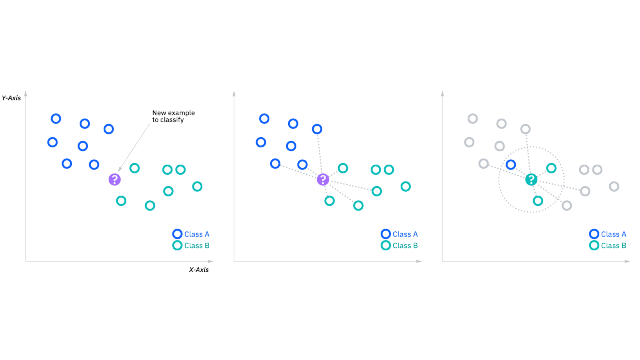

In [28]:
## IMPORT THE REQUIRED LIBRARYS ##
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt 
import random

font_size=12
line_width=1.5
output_dpi=300

## SETUP PLOTTING ##
try:
    plt.rcParams.update({ 
        "text.usetex": True,
        "font.family": "Computer Modern Roman",
        'font.size': font_size
    })
except:
    print("WARNING: LaTeX backend not configured properly. Not using.")
    plt.rcParams.update({"font.family": "serif",
            "font.serif": ["Times New Roman"],
    })

# Turn on axes grids.
plt.rcParams.update({"axes.grid" : True, 
                    "legend.framealpha": 1,
                    "legend.edgecolor": [1,1,1],
                    "lines.linewidth": line_width,
                    "savefig.dpi": output_dpi,
                    "savefig.format": 'pdf'})

# Change default font sizes.
plt.rc('font', size=font_size) #controls default text size
plt.rc('axes', titlesize=font_size) #fontsize of the title
plt.rc('axes', labelsize=font_size) #fontsize of the x and y labels
plt.rc('xtick', labelsize=font_size) #fontsize of the x tick labels
plt.rc('ytick', labelsize=font_size) #fontsize of the y tick labels
plt.rc('legend', fontsize=0.85*font_size) #fontsize of the legend 


In the next bit of code **train_test_split** is used. This is a function that takes an input of all the data, and randomly choose a certain subset to be used in training. Through the parameter <em>test_size</em>, we can input a percentage of the inputs to use. <em>random_state</em> will reproduce the same randomised results.

In [9]:
digits = load_digits() # get the data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=10) # get the test data

KNN models rely on a parameter **k**. The k defines how many neighbours each point considers when deciding what value it should take. 
In the below function we use the function **cross_val_score**, in order to see how well the particular k value scores. It's job is to, based off the model, iterate through each of the training data (hence its parameters), and see whether the guess is correct or not. The <em>cv </em> input is used in the K-folding evaluation method, where the data to train on is split into k "folds" and the data is trained and evaluated on each fold individually.

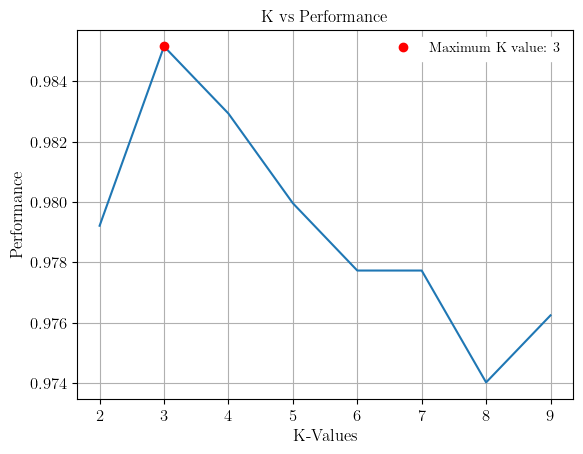

In [47]:
list_of_ks = np.arange(2, 10) # consider a k value ranging from 2 -> 10
scores = [] # how well does the value perform

# keep track of maxes
max_k = 0
max_val = 0

for k in list_of_ks:
    model = KNeighborsClassifier(n_neighbors=k) # create the particular model
    score = cross_val_score(model, X_train, y_train, cv=5) # find the score (will be for each 5 folds)
    scores.append(score.mean()) # average out the folds scoring
    
    if score.mean() > max_val: # check whether the score is a max (and update if yes)
        max_val = score.mean()
        max_k = k

best_model = KNeighborsClassifier(n_neighbors=max_k) # grab the best model for futher use

plt.plot(list_of_ks, scores)
plt.plot(max_k, max_val, "ro", label="Maximum K value: " + str(max_k))
plt.xlabel("K-Values")
plt.ylabel("Performance")
plt.title("K vs Performance")
plt.legend()
plt.show()

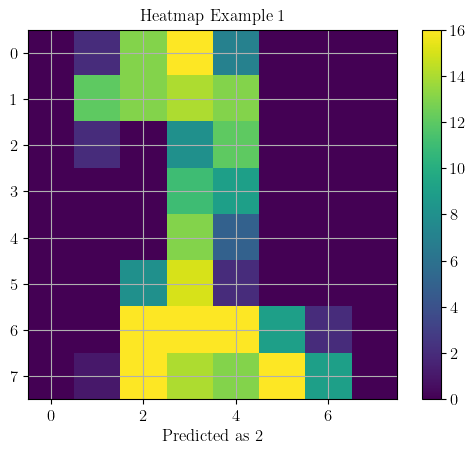

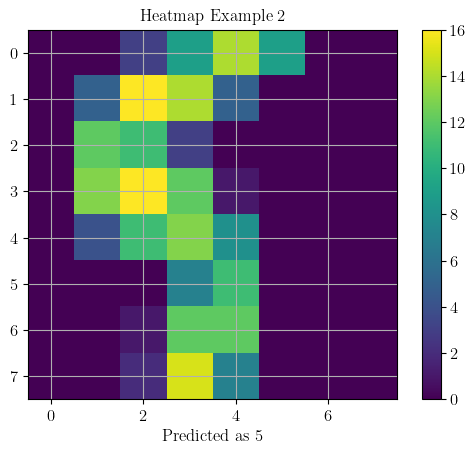

In [48]:
# get two random examples of the input data
rand_int_1, rand_int_2 = random.randint(0, len(digits.data)), random.randint(0, len(digits.data)) 
data_example_1 = digits.data[rand_int_1]
data_example_2 = digits.data[rand_int_2]

best_model.fit(X_train, y_train) # train the model

# use the trained model to predict the numbers 
prediction1 = best_model.predict([data_example_1])
prediction2 = best_model.predict([data_example_2])

# reshape so can be plotted
data_example_1 = data_example_1.reshape(8,8)
data_example_2 = data_example_2.reshape(8,8)

plt.imshow(data_example_1, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Add a colorbar for reference
plt.title('Heatmap Example 1')
plt.xlabel("Predicted as " + str(prediction1[0]))
plt.show()
plt.imshow(data_example_2, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Add a colorbar for reference
plt.title('Heatmap Example 2')
plt.xlabel("Predicted as " + str(prediction2[0]))
plt.show()


### Project 2 - Recognising Hand Signals ##
This project will hopefully have a bit of OPENCV video processing as well as some ML in order to recognise particular hand signals.


### References ###
[1] [K-nearest Algorithm from IBM](https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point)